In [21]:
%matplotlib tk
import numpy as np
import sys
import matplotlib.pyplot as plt
import glob
import pandas as pd
sys.path.append('/home/jleland/Coding/Projects/flopter')
import lputils as lp
from lputils import MagnumProbes
import fitters as fit

In [12]:
csv_files = glob.glob('/home/jleland/Data/Magnum/2018-06-07_Leland/nds*.csv')
csv_files.sort()

for csv_file in csv_files:
    print(csv_file)
    
print('\nRemoving {} \n'.format(csv_files[4]))
csv_files.pop(5)
csv_files.pop(0)
    
slm = 4.419412876e20
    
pumping = np.array([1.0, 0.75, 0.5, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25])
puffing = np.array([0.0, 0.00, 0.0, 0.00, 0.50, 1.00, 1.50, 2.00, 2.50, 3.00, 3.50]) * slm * 0.72258
d_puffing = puffing * 0.01

for i, csv_file in enumerate(csv_files):
    print('{}\t {} \t {:.2f}, {:.2g}\t'.format(i, csv_file, pumping[i], puffing[i]))
    
pump_frames = {pumping[i]: pd.read_csv(f, index_col=0) for i, f in enumerate(csv_files[:4])}
puff_frames = {puffing[i+3]: pd.read_csv(f, index_col=0) for i, f in enumerate(csv_files[3:])}
frames = [pd.read_csv(f, index_col=0) for f in csv_files]
print(pump_frames.keys())
print(puff_frames.keys())

/home/jleland/Data/Magnum/2018-06-07_Leland/ndsfile00.csv
/home/jleland/Data/Magnum/2018-06-07_Leland/ndsfile000.csv
/home/jleland/Data/Magnum/2018-06-07_Leland/ndsfile01.csv
/home/jleland/Data/Magnum/2018-06-07_Leland/ndsfile02.csv
/home/jleland/Data/Magnum/2018-06-07_Leland/ndsfile03.csv
/home/jleland/Data/Magnum/2018-06-07_Leland/ndsfile04.csv
/home/jleland/Data/Magnum/2018-06-07_Leland/ndsfile05.csv
/home/jleland/Data/Magnum/2018-06-07_Leland/ndsfile06.csv
/home/jleland/Data/Magnum/2018-06-07_Leland/ndsfile07.csv
/home/jleland/Data/Magnum/2018-06-07_Leland/ndsfile08.csv
/home/jleland/Data/Magnum/2018-06-07_Leland/ndsfile09.csv
/home/jleland/Data/Magnum/2018-06-07_Leland/ndsfile10.csv
/home/jleland/Data/Magnum/2018-06-07_Leland/ndsfile11.csv

Removing /home/jleland/Data/Magnum/2018-06-07_Leland/ndsfile03.csv 

0	 /home/jleland/Data/Magnum/2018-06-07_Leland/ndsfile000.csv 	 1.00, 0	
1	 /home/jleland/Data/Magnum/2018-06-07_Leland/ndsfile01.csv 	 0.75, 0	
2	 /home/jleland/Data/Magnum/2

(0, 10)

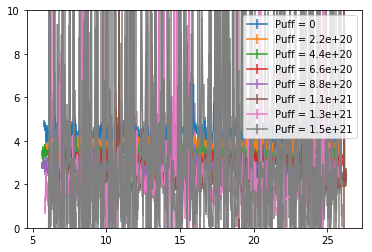

In [7]:
plt.figure()
for puff, df in puff_frames.items():
    plt.errorbar(df.index, 'T_e', yerr='d_T_e', data=df, label='Puff = {:.2g}'.format(puff))
plt.legend()
plt.ylim(0, 10)

# Plotting for comparison of different averaging / error estimation methods

In [8]:
def frame_analysis(frame, label='Fit values', variable='T_e', plot_fl=True):
    times = df.index.values
    values = df[variable].values
    errors = df['d_'+variable].values
    weights = errors
    
    orig_mean = np.average(values)
    orig_stdev = np.std(values)
    
    # Exclude values greater than 5 standard deviations from the mean
    allowed = np.where(((orig_mean + (5*orig_stdev)) >= values + errors) 
                       & ((orig_mean - (5*orig_stdev)) <= values - errors))
    times = times[allowed]
    values = values[allowed]
    errors = errors[allowed]
    weights = weights[allowed]

    w_mean = np.average(values, weights=weights)
    w_std_err = np.sqrt(np.average((values-w_mean)**2, weights=weights))
    
    mean = np.average(values)
    stdev = np.std(values)
    
    if plot_fl:
        sl_fitter = fit.StraightLineFitter()
        fit_data = sl_fitter.fit(times, values, sigma=errors)
        
        plt.figure()
        plt.errorbar(df.index, variable, yerr='d_' + variable, data=df, color='silver', ecolor='silver', 
                     zorder=-1, label=label)

        plt.errorbar(times, np.ones_like(values) * w_mean, yerr=w_std_err, color='blue', ecolor='midnightblue', 
                     alpha=0.2, label='Weighted')

        plt.errorbar(times, np.ones_like(values) * mean, yerr=stdev, color='red', ecolor='orangered', 
                     alpha=0.2, label='Arithmetic')

        plt.errorbar(*fit_data.get_fit_plottables(), yerr=fit_data.sigma, color='yellow', alpha=0.2)

        plt.axhline(y=orig_mean, color='green', linestyle='dashed', linewidth=1, label='Original')
        plt.axhline(y=orig_mean+(3*orig_stdev), color='green', linestyle='dashed', linewidth=1, 
                    label='Upper/Lower Bound')
        plt.axhline(y=orig_mean-(3*orig_stdev), color='green', linestyle='dashed', linewidth=1)

        plt.legend()
    
    return w_mean, max(w_std_err, stdev)

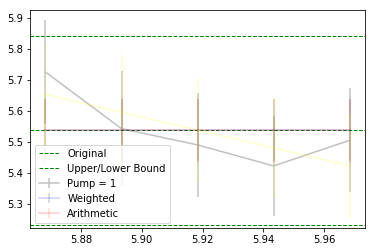

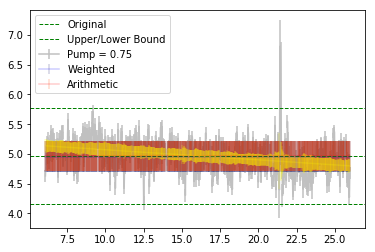

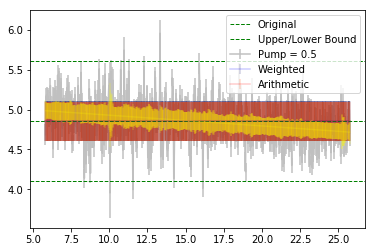

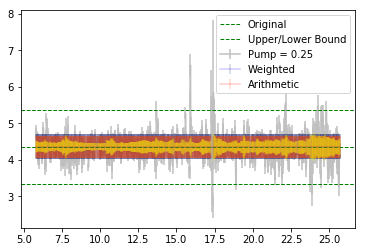

In [9]:
for i, [p, df] in enumerate(pump_frames.items()):
    frame_analysis(df, 'Pump = {:.2g}'.format(p))


/home/jleland/Coding/Environments/python3.6/lib/python3.6/site-packages/scipy/optimize/minpack.py:728: RuntimeWarning: divide by zero encountered in true_divide
  transform = 1.0 / sigma
/home/jleland/Coding/Environments/python3.6/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/jleland/Coding/Projects/flopter/fitters.py:91: RuntimeWarning: divide by zero encountered in true_divide
  fit_chi2 = (((y_data - fit_y_data) / sigma)**2).sum()


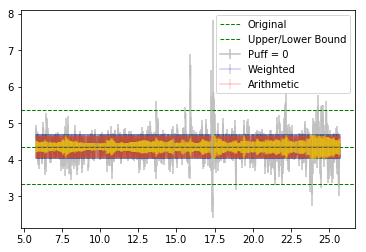

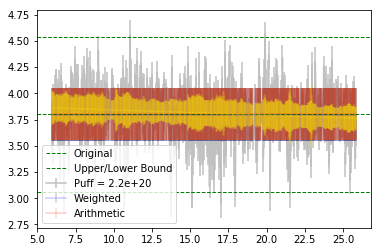

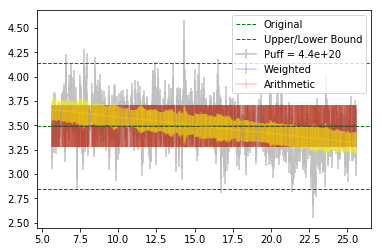

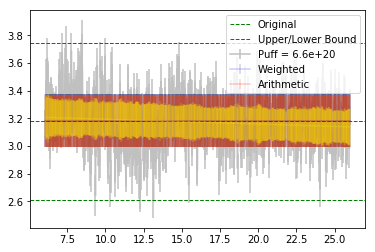

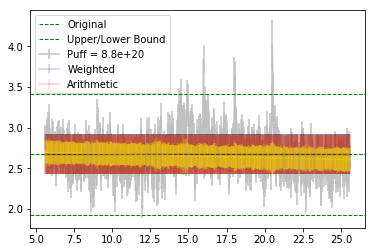

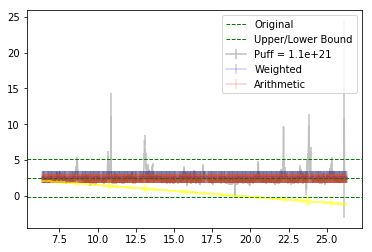

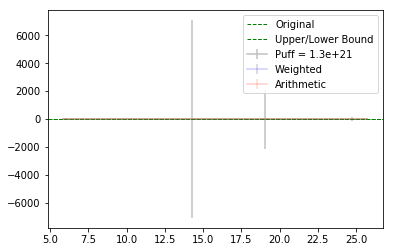

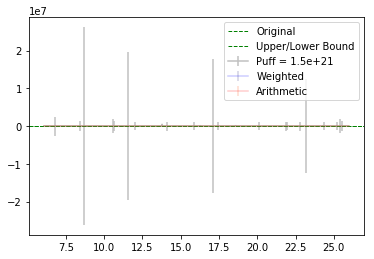

In [10]:
for i, [p, df] in enumerate(puff_frames.items()):
    frame_analysis(df, 'Puff = {:.2g}'.format(p))


# Creation of DataFrame from Applying Averaging Methods to Data

In [17]:
anal_data = pd.DataFrame({'puff': puffing, 'd_puff': d_puffing, 'pump': pumping})

for variable in ['I_sat', 'T_e', 'V_f', 'a']:
    var_data = np.zeros_like(puffing)
    var_err = np.zeros_like(puffing)
    for i, df in enumerate(frames): 
        w_mean, w_stdev = frame_analysis(df, plot_fl=False, variable=variable)
        var_data[i] = w_mean
        var_err[i] = w_stdev
    anal_data[variable] = var_data
    anal_data['d_' + variable] = var_err
    
for variable in ['T_e_ts', 'd_T_e_ts', 'n_e_ts', 'd_n_e_ts', 'TaChPresBara', 'TargetTiltingCurPos']:
    ts_var_data = np.zeros_like(puffing)
    for i, df in enumerate(frames):
        ts_var_data[i] = df[variable].mean()
    anal_data[variable] = ts_var_data
    
# Apply probe area analysis to get densities and add back into dataframe
probe_0 = MagnumProbes().probe_s

alpha = anal_data['TargetTiltingCurPos'].values
theta_perp = np.radians(np.abs(alpha))
d_theta_perp = np.radians(0.5)
A_coll_0 = probe_0.get_collection_area(theta_perp)
d_A_coll = 0.05 * A_coll_0

anal_data['A_coll'] = A_coll_0
anal_data['d_A_coll'] = d_A_coll
anal_data['c_s'] = lp.sound_speed(anal_data['T_e'].values, gamma_i=1)
anal_data['d_c_s'] = lp.d_sound_speed(anal_data['c_s'], anal_data['T_e'], anal_data['d_T_e'])
print(anal_data['c_s'].values[0], anal_data['d_c_s'].values[0], anal_data['I_sat'].values[0], A_coll_0[0])
anal_data['n_e'] = lp.electron_density(anal_data['I_sat'], anal_data['c_s'], A_coll_0)
anal_data['d_n_e'] = lp.d_electron_density(anal_data['n_e'], anal_data['c_s'], anal_data['d_c_s'], A_coll_0, 
                                           d_A_coll, anal_data['I_sat'], anal_data['d_I_sat'])

# Use densities and temperatures to calculate other values
j_sat = anal_data['I_sat'] / anal_data['A_coll']
d_j_sat = np.sqrt((anal_data['d_I_sat'] / anal_data['I_sat'])**2 
                      + (anal_data['d_A_coll'] / anal_data['d_A_coll'])**2)

q_par = 7 * anal_data['T_e'] * j_sat
d_q_par = np.abs(q_par) * np.sqrt((anal_data['d_T_e'] / anal_data['T_e'])**2 
                                            + (d_j_sat / j_sat)**2)

anal_data['j_sat'] = j_sat
anal_data['d_j_sat'] = d_j_sat
anal_data['q_par'] = q_par
anal_data['d_q_par'] = d_q_par


# Get equivalent TS measurements
anal_data['c_s_ts'] = lp.sound_speed(anal_data['T_e_ts'].values, gamma_i=1)
anal_data['d_c_s_ts'] = lp.d_sound_speed(anal_data['c_s_ts'], anal_data['T_e_ts'], anal_data['d_T_e_ts'])
# print(anal_data['c_s_ts'].values[0], anal_data['d_c_s_ts'].values[0], anal_data['I_sat'].values[0], A_coll_0[0])
anal_data['j_sat_ts'] = anal_data['c_s_ts'] * anal_data['n_e_ts'] * 1.6e-19
anal_data['d_j_sat_ts'] = np.abs(anal_data['j_sat_ts']) * np.sqrt((anal_data['d_c_s_ts'] / anal_data['c_s_ts'])**2 
                                  + (anal_data['d_n_e_ts'] / anal_data['n_e_ts'])**2)

q_par_ts = 7 * anal_data['T_e_ts'] * anal_data['j_sat_ts']
d_q_par_ts = np.abs(q_par_ts) * np.sqrt((anal_data['d_T_e_ts'] / anal_data['T_e_ts'])**2 
                                        + (anal_data['d_j_sat_ts'] / anal_data['j_sat_ts'])**2)
anal_data['q_par_ts'] = q_par_ts
anal_data['d_q_par_ts'] = d_q_par_ts

# Calculate electron pressure (simply)
elec_pressure = anal_data['T_e'] * anal_data['n_e']
d_elec_pressure = np.abs(elec_pressure) * np.sqrt((anal_data['d_T_e'] / anal_data['T_e'])**2 
                                                  + (anal_data['d_n_e'] / anal_data['n_e'])**2)
elec_pressure_ts = anal_data['T_e_ts'] * anal_data['n_e_ts']
d_elec_pressure_ts = np.abs(elec_pressure_ts) * np.sqrt((anal_data['d_T_e_ts'] / anal_data['T_e_ts'])**2 
                                                  + (anal_data['d_n_e_ts'] / anal_data['n_e_ts'])**2)

anal_data['P_e'] = elec_pressure
anal_data['d_P_e'] = d_elec_pressure
anal_data['P_e_ts'] = elec_pressure_ts
anal_data['d_P_e_ts'] = d_elec_pressure_ts

# Split the dataframe into puff and pump sections too
print(anal_data[['T_e_ts', 'j_sat', 'j_sat_ts']])
puff_data = anal_data.loc[anal_data['pump'] == 0.25]
pump_data = anal_data.loc[anal_data['puff'] == 0.00]

32573.794050655004 298.9147254439095 0.8057450105935335 2.7488933572856517e-06
      T_e_ts          j_sat       j_sat_ts
0   1.613766  293116.140158  396624.646757
1   1.351212  298934.216116  473615.122496
2   1.380516  287105.647240  471275.794222
3   1.058532  232223.576299  511781.434824
4   0.779704  202387.379036  506882.006399
5   0.662730  169937.408777  469251.212026
6   0.576083  130323.943860  432770.221026
7   0.496131   87929.983201  368433.361989
8   0.423374   51792.177051  296299.045497
9   0.364338   27137.303752  239426.562423
10  0.307162    9471.711794  157769.844336


# Plotting Routines for Different Variables

**Comparison of temperature and density measurements as a function of target chamber pressure**

In [18]:
fig, ax = plt.subplots()
handle1a = plt.errorbar(pump_data['TaChPresBara'], pump_data['T_e'], yerr=pump_data['d_T_e'], fmt='.-', 
                        color='maroon')
handle1b = plt.errorbar(puff_data['TaChPresBara'][:-1], puff_data['T_e'][:-1], yerr=puff_data['d_T_e'][:-1], 
                        fmt='rx-')
handle1c = plt.errorbar(anal_data['TaChPresBara'], anal_data['T_e_ts'], yerr=anal_data['d_T_e_ts'], fmt='y^-')
# ax.set_ylabel('Temperature (eV)')

ax2 = ax.twinx()
handle2a = plt.errorbar(pump_data['TaChPresBara'], pump_data['n_e'], yerr=pump_data['d_n_e'], fmt='.-', 
                        color='midnightblue')
handle2b = plt.errorbar(puff_data['TaChPresBara'][:-1], puff_data['n_e'][:-1], yerr=puff_data['d_T_e'][:-1], 
                        fmt='bx-')
handle2c = plt.errorbar(anal_data['TaChPresBara'], anal_data['n_e_ts'], yerr=anal_data['d_n_e_ts'], fmt='g^-')
ax2.set_ylabel(r'Density (m$^3$)')

handle3 = plt.axvline(x=puff_data['TaChPresBara'].values[0], linestyle='dotted', linewidth=1, color='silver')
plt.legend([handle1a, handle1b, handle1c, handle2a, handle2b, handle2c, handle3], 
           [r'$T_e$ - Pumping', r'$T_e$ - Puffing', r'$T_e$ - Thomson', 
            r'$n_e$ - Pumping', r'$n_e$ - Puffing', r'$n_e$ - Thomson', 
            'Cutoff'])

ax.set_xlabel('Target Chamber Pressure (mTorr)')
plt.show()

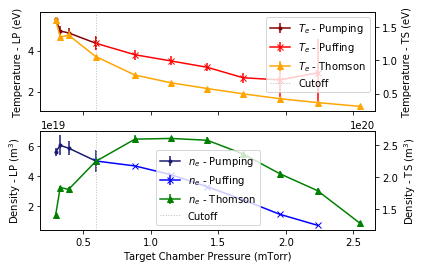

In [16]:
fig, ax = plt.subplots(2, 1, sharex=True, sharey=False)

plt.sca(ax[0])
handle1a = plt.errorbar(pump_data['TaChPresBara'], pump_data['T_e'], yerr=pump_data['d_T_e'], fmt='.-', 
                        color='maroon')
handle1b = plt.errorbar(puff_data['TaChPresBara'][:-1], puff_data['T_e'][:-1], yerr=puff_data['d_T_e'][:-1], 
                        fmt='rx-')
ax[0].set_ylabel('Temperature - LP (eV)')

ax0 = ax[0].twinx()
handle1c = plt.errorbar(anal_data['TaChPresBara'], anal_data['T_e_ts'], yerr=anal_data['d_T_e_ts'], fmt='^-',
                        color='orange')
handle1d = plt.axvline(x=puff_data['TaChPresBara'].values[0], linestyle='dotted', linewidth=1, color='silver')
ax0.set_ylabel('Temperature - TS (eV)')

plt.legend([handle1a, handle1b, handle1c, handle1d], 
           [r'$T_e$ - Pumping', r'$T_e$ - Puffing', r'$T_e$ - Thomson', 'Cutoff'])


plt.sca(ax[1])
handle2a = plt.errorbar(pump_data['TaChPresBara'], pump_data['n_e'], yerr=pump_data['d_n_e'], fmt='.-', 
                        color='midnightblue')
handle2b = plt.errorbar(puff_data['TaChPresBara'][:-1], puff_data['n_e'][:-1], yerr=puff_data['d_T_e'][:-1], 
                        fmt='bx-')
ax[1].set_ylabel(r'Density - LP (m$^3$)')

ax1 = ax[1].twinx()
handle2c = plt.errorbar(anal_data['TaChPresBara'], anal_data['n_e_ts'], yerr=anal_data['d_n_e_ts'], fmt='g^-')
ax1.set_ylabel(r'Density - TS (m$^3$)')

handle2d = plt.axvline(x=puff_data['TaChPresBara'].values[0], linestyle='dotted', linewidth=1, color='silver')
plt.legend([handle2a, handle2b, handle2c, handle2d], 
           [r'$n_e$ - Pumping', r'$n_e$ - Puffing', r'$n_e$ - Thomson', 'Cutoff'])

ax[1].set_xlabel('Target Chamber Pressure (mTorr)')
plt.show()

In [26]:
# Combined plot of T_e, n_e and P_e comparison with TS
fig, ax = plt.subplots(3, 1, sharex=True, sharey=False)

plt.sca(ax[0])
handle1a = plt.errorbar(pump_data['TaChPresBara'], pump_data['T_e'], yerr=pump_data['d_T_e'], fmt='.-', 
                        color='maroon')
handle1b = plt.errorbar(puff_data['TaChPresBara'][:-1], puff_data['T_e'][:-1], yerr=puff_data['d_T_e'][:-1], 
                        fmt='rx-')
ax[0].set_ylabel('Temperature - LP (eV)')

ax0 = ax[0].twinx()
handle1c = plt.errorbar(anal_data['TaChPresBara'], anal_data['T_e_ts'], yerr=anal_data['d_T_e_ts'], fmt='^-',
                        color='orange')
handle1d = plt.axvline(x=puff_data['TaChPresBara'].values[0], linestyle='dotted', linewidth=1, color='silver')
ax0.set_ylabel('Temperature - TS (eV)')

plt.legend([handle1a, handle1b, handle1c, handle1d], 
           [r'$T_e$ - Pumping', r'$T_e$ - Puffing', r'$T_e$ - Thomson', 'Cutoff'])


plt.sca(ax[1])
handle2a = plt.errorbar(pump_data['TaChPresBara'], pump_data['n_e'], yerr=pump_data['d_n_e'], fmt='.-', 
                        color='midnightblue')
handle2b = plt.errorbar(puff_data['TaChPresBara'][:-1], puff_data['n_e'][:-1], yerr=puff_data['d_T_e'][:-1], 
                        fmt='bx-')
ax[1].set_ylabel(r'Density - LP (m$^3$)')

ax1 = ax[1].twinx()
handle2c = plt.errorbar(anal_data['TaChPresBara'], anal_data['n_e_ts'], yerr=anal_data['d_n_e_ts'], fmt='g^-')
ax1.set_ylabel(r'Density - TS (m$^3$)')

handle2d = plt.axvline(x=puff_data['TaChPresBara'].values[0], linestyle='dotted', linewidth=1, color='silver')
plt.legend([handle2a, handle2b, handle2c, handle2d], 
           [r'$n_e$ - Pumping', r'$n_e$ - Puffing', r'$n_e$ - Thomson', 'Cutoff'])


plt.sca(ax[2])
handle3a = plt.errorbar(pump_data['TaChPresBara'], pump_data['P_e'], yerr=pump_data['d_P_e'], fmt='.-', 
                        color='midnightblue')
handle3b = plt.errorbar(puff_data['TaChPresBara'][:-1], puff_data['P_e'][:-1], yerr=puff_data['d_P_e'][:-1], 
                        fmt='bx-')
ax[2].set_ylabel(r'$P_e$ - LP (m$^3$)')

# ax1 = ax[2].twinx()
handle3c = plt.errorbar(anal_data['TaChPresBara'], anal_data['P_e_ts'], yerr=anal_data['d_P_e_ts'], fmt='g^-')
ax1.set_ylabel(r'$P_e$ - TS (m$^3$)')

handle3d = plt.axvline(x=puff_data['TaChPresBara'].values[0], linestyle='dotted', linewidth=1, color='silver')
plt.legend([handle3a, handle3b, handle3c, handle3d], 
           [r'$P_e$ - Pumping', r'$P_e$ - Puffing', r'$P_e$ - Thomson', 'Cutoff'])

ax[2].set_xlabel('Target Chamber Pressure (mTorr)')

plt.show()

In [ ]:
# Plot of P_e compared against TS
conv_factor = (1.6e-19 / 133.322) * 1000

plt.figure()
plt.errorbar(anal_data['TaChPresBara'][:-1], anal_data['P_e'][:-1] * conv_factor, yerr=anal_data['d_P_e'][:-1] * conv_factor, fmt='.-', 
             color='midnightblue', label=r'$P_e$ - Probe')
# plt.errorbar(puff_data['TaChPresBara'][:-1], puff_data['P_e'][:-1] * conv_factor, yerr=puff_data['d_P_e'][:-1] *conv_factor, 
#                         fmt='bx-')
plt.ylabel(r'$P_e$ (mTorr)')

plt.errorbar(anal_data['TaChPresBara'], anal_data['P_e_ts'] * conv_factor, yerr=anal_data['d_P_e_ts'] * conv_factor, fmt='g^-', 
             label=r'$P_e$ - Thomson')

plt.axvline(x=puff_data['TaChPresBara'].values[0], linestyle='dotted', linewidth=1, color='silver')
plt.legend()

plt.xlabel('Target Chamber Pressure (mTorr)')

plt.show()

In [30]:
fig, ax = plt.subplots(2, 1, sharex=True, sharey=False)

plt.sca(ax[0])
handle1a = plt.errorbar(pump_data['TaChPresBara'], pump_data['T_e'], yerr=pump_data['d_T_e'], fmt='.-', 
                        color='maroon')
handle1b = plt.errorbar(puff_data['TaChPresBara'][:-1], puff_data['T_e'][:-1], yerr=puff_data['d_T_e'][:-1], 
                        fmt='rx-')
ax[0].set_ylabel('Temperature - LP (eV)')

handle1c = plt.errorbar(anal_data['TaChPresBara'], anal_data['T_e_ts'], yerr=anal_data['d_T_e_ts'], fmt='^-',
                        color='orange')
handle1d = plt.axvline(x=puff_data['TaChPresBara'].values[0], linestyle='dotted', linewidth=1, color='silver')

plt.legend([handle1a, handle1b, handle1c, handle1d], 
           [r'$T_e$ - Pumping', r'$T_e$ - Puffing', r'$T_e$ - Thomson', 'Cutoff'])


plt.sca(ax[1])
handle2a = plt.errorbar(pump_data['TaChPresBara'], pump_data['n_e'], yerr=pump_data['d_n_e'], fmt='.-', 
                        color='midnightblue')
handle2b = plt.errorbar(puff_data['TaChPresBara'][:-1], puff_data['n_e'][:-1], yerr=puff_data['d_T_e'][:-1], 
                        fmt='bx-')
ax[1].set_ylabel(r'Density - LP (m$^3$)')

handle2c = plt.errorbar(anal_data['TaChPresBara'], anal_data['n_e_ts'], yerr=anal_data['d_n_e_ts'], fmt='g^-')
ax[1].set_ylabel(r'Density - TS (m$^3$)')

handle2d = plt.axvline(x=puff_data['TaChPresBara'].values[0], linestyle='dotted', linewidth=1, color='silver')
plt.legend([handle2a, handle2b, handle2c, handle2d], 
           [r'$n_e$ - Pumping', r'$n_e$ - Puffing', r'$n_e$ - Thomson', 'Cutoff'])

ax[1].set_xlabel('Target Chamber Pressure (mTorr)')
plt.show()

***Plot of ${J_{sat}}$ as a function of gas puffing ***

In [63]:
plt.figure
plt.errorbar(puff_data['j_sat'], puff_data['puff'], yerr=puff_data['d_puff'], xerr=puff_data['d_j_sat'])
plt.xlabel(r'$J_{sat}$ (Am$^{-2}$)')
plt.ylabel(r'Gas Puffing (particles s$^{-1}$)')

Text(0,0.5,'Gas Puffing (particles s$^{-1}$)')

**Plot of heat flux as a function of gas puffing**

In [79]:
plt.figure()
plt.errorbar(puff_data['puff'][:-1], puff_data['q_par'][:-1] / 1e6, xerr=puff_data['d_puff'][:-1], 
             yerr=puff_data['d_q_par'][:-1] / 1e6)
plt.ylabel(r'$q_{\parallel}$ (MWm$^{-2}$)')
plt.xlabel(r'Gas Puffing (particles s$^{-1}$)')

Text(0.5,0,'Gas Puffing (particles s$^{-1}$)')

In [80]:
plt.figure()
plt.errorbar(anal_data['TaChPresBara'][:-1], anal_data['q_par'][:-1] / 1e6, yerr=anal_data['d_q_par'][:-1] / 1e6)
plt.ylabel(r'$q_{\parallel}$ (MWm$^{-2}$)')
plt.xlabel(r'Target Chamber Pressure (mTorr)')

Text(0.5,0,'Target Chamber Pressure (mTorr)')

**Dual plot of J_sat and heatflux as a function of gas puffing**

In [30]:
fig, ax = plt.subplots(2, 1, sharex=True, sharey=False)
plt.sca(ax[0])
plt.errorbar(puff_data['puff'], puff_data['j_sat'] / 1e3, xerr=puff_data['d_puff'], 
             yerr=puff_data['d_j_sat'] / 1e3, color='red')
plt.ylabel(r'$J_{sat}$ (kAm$^{-2}$)')

plt.sca(ax[1])
plt.errorbar(puff_data['puff'][:-1], puff_data['q_par'][:-1] / 1e6, xerr=puff_data['d_puff'][:-1], 
             yerr=puff_data['d_q_par'][:-1] / 1e6, color='blue')
plt.ylabel(r'$q_{\parallel}$ (MWm$^{-2}$)')
plt.xlabel(r'Gas Puffing (particles s$^{-1}$)')

Text(0.5,0,'Gas Puffing (particles s$^{-1}$)')

In [40]:
fig, ax = plt.subplots(2, 1, sharex=True, sharey=False)
plt.sca(ax[0])
plt.errorbar(puff_data['puff'], puff_data['j_sat'] / 1e3, xerr=puff_data['d_puff'], fmt='x-',
             yerr=puff_data['d_j_sat'] / 1e3, color='red', label='Probes')
plt.errorbar(puff_data['puff'], puff_data['j_sat_ts'] / 1e3, xerr=puff_data['d_puff'], fmt='^-', 
             yerr=puff_data['d_j_sat_ts'] / 1e3, color='orange', label='TS')
plt.ylabel(r'$J_{sat}$ (kAm$^{-2}$)')
plt.legend()

plt.sca(ax[1])
plt.errorbar(puff_data['puff'][:-1], puff_data['q_par'][:-1] / 1e6, xerr=puff_data['d_puff'][:-1], fmt='x-',
             yerr=puff_data['d_q_par'][:-1] / 1e6, color='blue', label='Probes')
plt.errorbar(puff_data['puff'][:-1], puff_data['q_par_ts'][:-1] / 1e6, xerr=puff_data['d_puff'][:-1], fmt='^-',
             yerr=puff_data['d_q_par_ts'][:-1] / 1e6, color='green', label='TS')
plt.ylabel(r'$q_{\parallel}$ (MWm$^{-2}$)')
plt.xlabel(r'Gas Puffing (particles s$^{-1}$)')
plt.legend()

In [35]:
fig, ax = plt.subplots(2, 1, sharex=True, sharey=False)
plt.sca(ax[0])
plt.errorbar(anal_data['TaChPresBara'], anal_data['j_sat'] / 1e3, yerr=anal_data['d_j_sat'] / 1e3, color='red', 
             label='Probes')
plt.errorbar(anal_data['TaChPresBara'], anal_data['j_sat_ts'] / 1e3, yerr=anal_data['d_j_sat_ts'] / 1e3, 
             color='orange', label='TS')
plt.ylabel(r'$J_{sat}$ (kAm$^{-2}$)')
plt.legend()

plt.sca(ax[1])
plt.errorbar(anal_data['TaChPresBara'][:-1], anal_data['q_par'][:-1] / 1e6, 
             yerr=anal_data['d_q_par'][:-1] / 1e6, color='blue', label='Probes')
plt.errorbar(anal_data['TaChPresBara'][:-1], anal_data['q_par_ts'][:-1] / 1e6, 
             yerr=anal_data['d_q_par_ts'][:-1] / 1e6, color='green', label='TS')
plt.ylabel(r'$q_{\parallel}$ (MWm$^{-2}$)')
plt.xlabel(r'Target Chamber Pressure (mTorr)')
plt.legend()

**Comparison plot of temperature measured with probes and Thomson scattering**

In [139]:
plt.figure()
plt.errorbar(puff_data['puff'], puff_data['T_e'], xerr=puff_data['d_puff'], yerr=puff_data['d_T_e'], label='LPs')
plt.errorbar(puff_data['puff'], puff_data['T_e_ts'], xerr=puff_data['d_puff'], yerr=puff_data['d_T_e_ts'], 
             label='TS')
plt.ylabel(r'$T_e$ (eV)')
plt.xlabel(r'Gas Puffing (particles s$^{-1}$)')
plt.legend()

**Comparison plot of densities measured with probes and Thomson scattering**

In [19]:
plt.figure()
plt.errorbar(puff_data['puff'], puff_data['n_e'], xerr=puff_data['d_puff'], yerr=puff_data['d_n_e'], 
             label='LPs')
plt.errorbar(puff_data['puff'], puff_data['n_e_ts'], xerr=puff_data['d_puff'], yerr=puff_data['d_n_e_ts'], 
             label='TS')
plt.ylabel(r'$n_e$ (m$^{-3}$)')
plt.xlabel(r'Gas Puffing (particles s$^{-1}$)')
plt.legend()

**Plot of saturation current as a function of neutral gas puffing**

In [20]:
plt.figure()
plt.errorbar(puff_data['puff'], puff_data['I_sat'], xerr=puff_data['d_puff'], yerr=puff_data['d_I_sat'], 
             label='LPs')
plt.ylabel(r'$I_{sat}$ (A)')
plt.xlabel(r'Gas Puffing (particles s$^{-1}$)')
plt.legend()

**Comparison plot of temperatures and saturation currents taken by probes as a function of puffing data**

In [21]:
fig, ax = plt.subplots()
handle1 = plt.errorbar(puff_data['puff'], puff_data['I_sat'], xerr=puff_data['d_puff'], yerr=puff_data['d_I_sat'], 
                       label=r'$I_{sat}$', color='blue')
plt.ylabel(r'$I_{sat}$ (A)')
plt.xlabel(r'Gas Puffing (particles s$^{-1}$)')

ax2 = ax.twinx()
handle2 = plt.errorbar(puff_data['puff'][:-1], puff_data['T_e'][:-1], xerr=puff_data['d_puff'][:-1], 
                       yerr=puff_data['d_T_e'][:-1], label=r'$T_e$', color='red')
plt.ylabel(r'$T_e$ (eV)')
plt.legend(handles=[handle1, handle2])

In [22]:
plt.figure()
plt.errorbar(puff_data['n_e'], puff_data['a'], xerr=puff_data['d_n_e'], yerr=puff_data['d_a'], 
             label='LPs')
plt.ylabel(r'Sheath expansion parameter')
plt.xlabel(r'Gas Puffing (particles s$^{-1}$)')
plt.legend()